# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [4]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


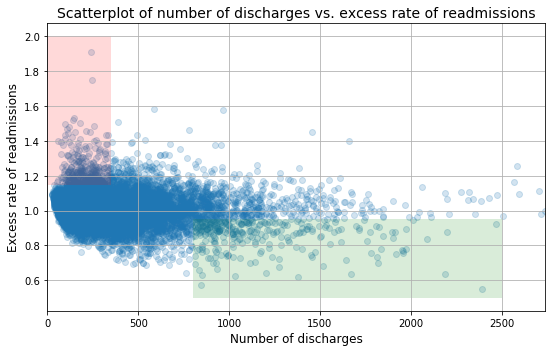

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis and recommendation due to the following reasons
* The analysis has been performed based on visualizing a scatter plot and percentages of readmission rates <100 and >1000. And the Regulatory policy recommendations is provided for hospital capacity <300. There is no justification for the number 300
* The excess readmission rates 1.023 and 0.978 seems very close to 1. Without any statistical insights (e.g. confidence intervals), it is both difficult to get an intution and wouldnt be fair to draw any conclusions with these results

## Look at the Data

### Missing Values
From the above .info() summary, we notice that the number of entries in 'Excess Readmission Ratio' (=11497) is still lower than the number of observations (=11578). 

In [6]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


Dropping the NaN values in 'Excess Readmission Ratio' column

In [7]:
data = clean_hospital_read_df.dropna(subset = ['Excess Readmission Ratio'])
data.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis


### Setting up an appropriate Hypothesis Test
**H0: 'Number of Discharges' and 'Excess Readmission Ratio' are uncorrelated**  
**Ha: 'Number of Discharges' and 'Excess Readmission Ratio' are not uncorrelated** (i.e., there are correlated.)


### Computing the observed significance value (or p-value).

#### Bootstrap method

In [9]:
num_discharge = data['Number of Discharges'].copy()
excess_readmission = data['Excess Readmission Ratio'].copy()

observed_corr = np.corrcoef(num_discharge, excess_readmission)[0, 1]
bs_replicates = np.empty(10000)
for i in range(10000):
    num_discharge_perm = np.random.permutation(num_discharge)
    bs_replicates[i]=np.corrcoef(num_discharge_perm, excess_readmission)[0, 1]
p = np.sum(np.abs(bs_replicates) >= np.abs(observed_corr))

print('Bootstram One-Sample Hypothesis Testing')
print('Observed Statistic = "Pearsons Correlation Coefficient between Number of Dischaged & Excess Readmission Ratio"')
print('Mean Observed Correlation b/w Number of Discharged and Excess Readmissions = %.3f' %observed_corr)
print('p-value for the Observed Correlation = %.2e' %p)

Bootstram One-Sample Hypothesis Testing
Observed Statistic = "Pearsons Correlation Coefficient between Number of Dischaged & Excess Readmission Ratio"
Mean Observed Correlation b/w Number of Discharged and Excess Readmissions = -0.097
p-value for the Observed Correlation = 0.00e+00


#### Frequentist Method

* Using z-statistic since the number of observations = 11497 > normal requirement of 30
* Standard Error for Perasons's Correlation Coefficient $= SE_r \approx \sqrt{\frac{1-r^2}{n-2}}$, where $r$ is the correlation estimate. 

In [10]:
num_discharge = data['Number of Discharges'].copy()
excess_readmission = data['Excess Readmission Ratio'].copy()

mu, mu_h0 = np.corrcoef(num_discharge, excess_readmission)[0, 1], 0
n = len(data['Number of Discharges'])
se = np.sqrt((1-mu**2)/(n-2))
z = (mu-mu_h0)/se
p = 2*stats.norm.cdf(z)

print('Frequentist One-Sample Hypothesis Testing')
print('Observed Statistic = "Pearsons Correlation Coefficient between Number of Dischaged & Excess Readmission Ratio"')
print('Mean of Observed Statistic = %.2e' %(mu))
print('Standard Error (SE) = %.2e' %se)
print('Z-statistic for the mean of observed statistic (abs(z) >= abs(%.3f) = %.3f' %((mu-mu_h0), z) )
print('p-value using z-statistics = %.2e' %p)

Frequentist One-Sample Hypothesis Testing
Observed Statistic = "Pearsons Correlation Coefficient between Number of Dischaged & Excess Readmission Ratio"
Mean of Observed Statistic = -9.74e-02
Standard Error (SE) = 9.28e-03
Z-statistic for the mean of observed statistic (abs(z) >= abs(-0.097) = -10.492
p-value using z-statistics = 9.36e-26


### Confidence Interval
Below we would like to analyze the 99% confidence interval of the observed correlation value. 

In [11]:
num_discharge = data['Number of Discharges'].copy()
excess_readmission = data['Excess Readmission Ratio'].copy()

confidence = 99
mu, mu_h0 = np.corrcoef(num_discharge, excess_readmission)[0, 1], 0
n = len(data['Number of Discharges'])
se = np.sqrt((1-mu**2)/(n-2))
margin_of_error = stats.norm.ppf(0.5+confidence/200)*se
confidence_interval = [mu-margin_of_error, mu+margin_of_error]

print('Frequentist One-Sample %.1f %% Confidence Interval'%confidence)
print('Observed Statistic = "Pearsons Correlation Coefficient between Number of Dischaged & Excess Readmission Ratio"')
print('Mean of Observed Statistic = %.2e' %(mu))
print('Standard Error (SE) = %.2e' %se)
print('Margin of Error = %.2e' %margin_of_error)
print('Confidence interval of Observed Statistic = [%.3f, %.3f]' %(confidence_interval[0], confidence_interval[1]))

Frequentist One-Sample 99.0 % Confidence Interval
Observed Statistic = "Pearsons Correlation Coefficient between Number of Dischaged & Excess Readmission Ratio"
Mean of Observed Statistic = -9.74e-02
Standard Error (SE) = 9.28e-03
Margin of Error = 2.39e-02
Confidence interval of Observed Statistic = [-0.121, -0.073]


### Statistical Significance for $\alpha - 0.01$
The observed p-value ($9.36 \times 10^{-26}$) is way lower than the statistical significance value $\alpha = 0.01$. Hence we reject the null hpyothesis H0 and accept the alternate hypothesis Ha. 

### Statistical Significance vs. Practical Significance. How does this change your recommendation to the client?
Statistically, the above analysis indicates a very low p-value (close to 0) for the assumed null hypothesis H0 which inturn indicates strongly that the H0 = 'Number of Discharges' and 'Excess Readmission Ratio' is **NOT** true. Also the 99% confidence interval [-0.121, -0.073] excludes the 0 value (0 indicating not correlated). As a result we can conclude that there is **correlation between 'Number of Discharges' and 'Excess Readmission Ratio'.** However practically speaking, the correlation magnitude seems to be very small, which suggests that the dependency between these two parameters is very weak. 

**In other words, though statistical analysis indicated strongly that there is a correlation between 'Number of Discharges' and 'Excess Readmission Ratio', practically speaking, this correlation is very weak**. The correlation value of -0.01 (and the below scatter plot) suggests that increase in 'Number of Discharges' by 1000 / year would result in decrease in Excess Readmission ratio by only 0.03. 

Hence I wouldnt recommend regulatory policy to spend time/resource in checking for upgraded resource allocation for quality care at hospitals with smaller capacity (<300)


### What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.
Scatter plots tend to provide more insight into the dependency of the variables being plotted. In the above scatter plot, though there seems to be a dependency between the 'Number of Discharges' and 'Excess Readmission Ratio', it does not bring out the extent of this dependency. The polyfit provides a best-linear fit for the data set. Including this into the scatter plot would provide a clearer insight to this dependency. From the below scatter plot we can see that, though there is a dependency between the two variables, the slope of the best-linear fit line indicates that this dependency is not practically significant. 

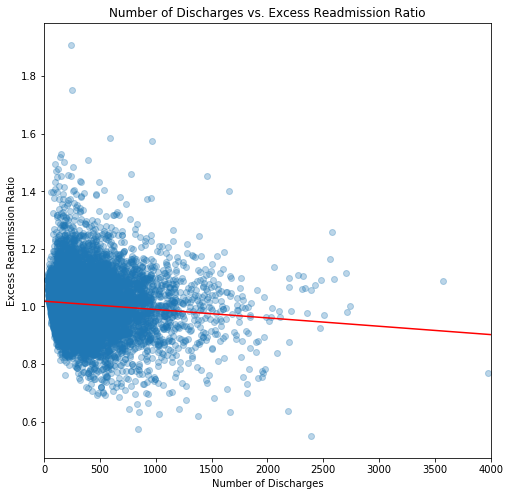

In [12]:
slope, intercept = np.polyfit(data['Number of Discharges'], data['Excess Readmission Ratio'], 1)
x = np.array([0, 7000])
y = slope*x+intercept
f, axes = plt.subplots(figsize=(8, 8))
axes.scatter(x=data['Number of Discharges'], y=data['Excess Readmission Ratio'], alpha=0.3)
axes.plot(x, y, color='red')
axes.set(title='Number of Discharges vs. Excess Readmission Ratio', xlabel='Number of Discharges', ylabel='Excess Readmission Ratio', xlim=[0, 4000])
plt.show()

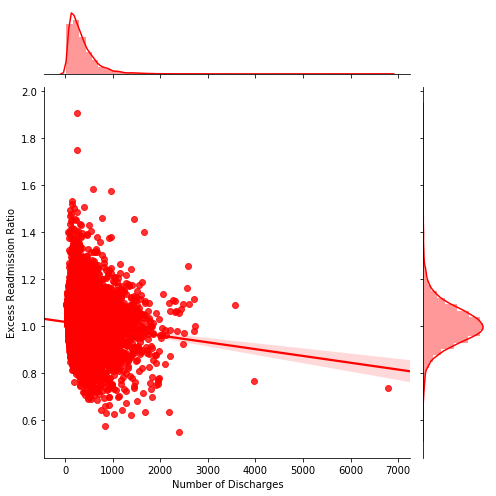

In [13]:
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data = data, kind='reg', color='red', size=7)
plt.show()